# WeatherAPI
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat.append(lat_lng[0])
        lng.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))

cities_df = pd.DataFrame({"City":cities,"Latitude":lat,"Longitude":lng})
cities_df.tail()




597


,City,Latitude,Longitude
592,sittwe,16.826249,90.251911
593,bronderslev,57.345152,9.894608
594,betare oya,5.135431,13.932356
595,ahau,-13.681791,174.585275
596,lagoa,-29.407311,-43.259241


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [43]:
### TEST
response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={cities_df['Latitude'].iloc[0]}&lon={cities_df['Longitude'].iloc[0]}&appid={weather_api_key}&units={"imperial"}').json()

temp = response['main']['temp_max']
humidity = response['main']['humidity']
cloudiness = response['clouds']['all']
wind_speed = response['wind']['speed']
country = response['sys']['country']
date = response['dt']

print("Temperature--", temp, "F")
print("Humidity--", humidity, "%")
print("Cloudiness--", cloudiness, "%")
print('Wind Speed--', wind_speed, "mph")
print('Country--', country)
print('Date--', date)

pprint(response)

Temperature-- 89.24 F
Humidity-- 40 %
Cloudiness-- 30 %
Wind Speed-- 6.58 mph
Country-- BR
Date-- 1714503732
{'base': 'stations',
 'clouds': {'all': 30},
 'cod': 200,
 'coord': {'lat': -9.53, 'lon': -37.6308},
 'dt': 1714503732,
 'id': 3403344,
 'main': {'feels_like': 89.58,
          'grnd_level': 983,
          'humidity': 40,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 89.24,
          'temp_max': 89.24,
          'temp_min': 89.24},
 'name': 'Canindé de São Francisco',
 'sys': {'country': 'BR', 'sunrise': 1714466062, 'sunset': 1714508448},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 91, 'gust': 9.93, 'speed': 6.58}}


In [44]:
record_count = 0
set_count = 1
temps = []
humidities = []
clouds = []
wind_speeds = []
countries =[]
dates = []


print("Beginning Data Retrieval")
print("-------------------------")
for index, row in cities_df.iterrows():
    record_count += 1
    print(f"Processing Record {record_count} of Set {set_count} | {row['City']}")
    
    response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={row['Latitude']}&lon={row['Longitude']}&appid={weather_api_key}&units={"imperial"}').json()

    temp = response['main']['temp_max']
    humidity = response['main']['humidity']
    cloudiness = response['clouds']['all']
    wind_speed = response['wind']['speed']
    date = response['dt']
    try:
        country = response['sys']['country']
    except:
        country=None
        print(f"API call for {row['City']} returned no country data")

    temps.append(temp)
    humidities.append(humidity)
    clouds.append(cloudiness)
    wind_speeds.append(wind_speed)
    countries.append(country)
    dates.append(date)
    
    if record_count == 50:
         time.sleep(60)
         record_count = 0
         set_count+=1

print("-------------------------")    
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | caninde de sao francisco
Processing Record 2 of Set 1 | al majaridah
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
API call for petropavlovsk-kamchatsky returned no country data
Processing Record 4 of Set 1 | hermanus
API call for hermanus returned no country data
Processing Record 5 of Set 1 | anadyr
API call for anadyr returned no country data
Processing Record 6 of Set 1 | candeleda
Processing Record 7 of Set 1 | demopolis
Processing Record 8 of Set 1 | gazojak
Processing Record 9 of Set 1 | sur
API call for sur returned no country data
Processing Record 10 of Set 1 | copala
API call for copala returned no country data
Processing Record 11 of Set 1 | la ronge
API call for la ronge returned no country data
Processing Record 12 of Set 1 | oakdale
Processing Record 13 of Set 1 | taiohae
API call for taiohae returned no country data
Processing Record 14 of Set 1 | neiafu
API call for neiafu retur

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_data = {
    "Temperature": temps,
    "Humidity": humidities,
    "Cloudiness": clouds,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
}

cities_df = cities_df.assign(**weather_data)
cities_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,caninde de sao francisco,-9.530050,-37.630754,89.24,40,30,6.58,BR,1714503732
1,al majaridah,18.703468,40.833821,84.49,81,0,12.24,SA,1714503749
2,petropavlovsk-kamchatsky,40.128209,167.921532,47.16,58,100,2.01,None,1714503749
3,hermanus,-51.880572,15.967516,34.39,72,6,15.01,None,1714503749
4,anadyr,46.064133,179.357052,39.92,75,100,30.42,None,1714503749


In [47]:
cities_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,17.064025,18.671142,61.684975,69.582915,60.700168,11.295896,1.714504e+09
std,35.032672,91.579271,25.264248,22.417528,42.248612,7.392539,2.215317e+02
min,-88.043732,-178.858965,-57.230000,7.000000,0.000000,0.130000,1.714504e+09
25%,-8.154682,-57.717813,48.310000,61.000000,12.000000,5.480000,1.714504e+09
50%,21.065971,26.031476,69.170000,75.000000,85.000000,10.130000,1.714504e+09
75%,43.396924,96.177985,81.460000,84.000000,100.000000,15.500000,1.714504e+09
max,89.631308,179.357052,99.190000,100.000000,100.000000,43.730000,1.714504e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

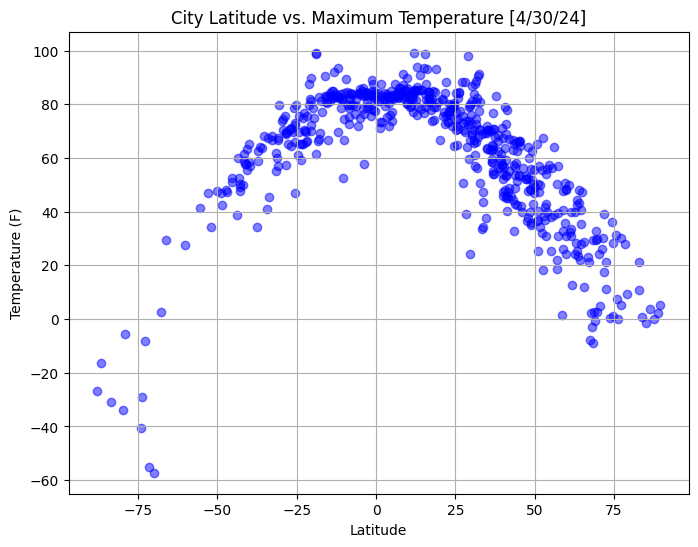

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(cities_df['Latitude'], cities_df['Temperature'], color='blue', alpha=0.5)
plt.title('City Latitude vs. Maximum Temperature [4/30/24]')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()

The maximum temperature of each city can be very clearly predicted by its latitude.  We know this as the poles (min, max) of the planet are colder and the equator (0) is warmer.

## Latitude vs. Humidity Plot

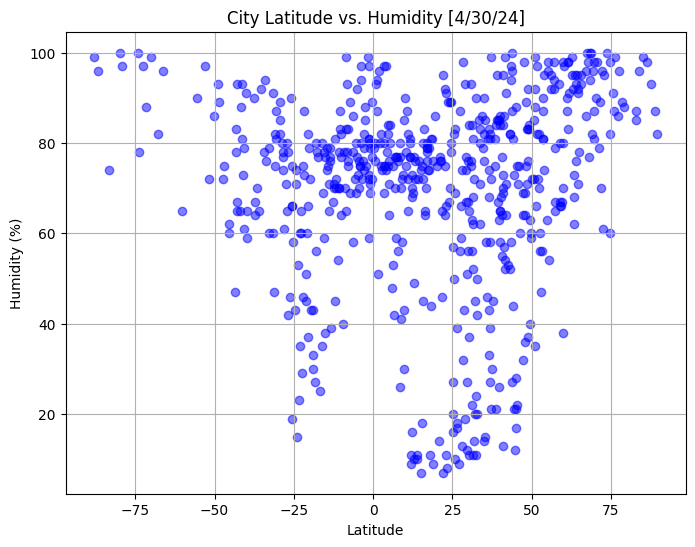

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(cities_df['Latitude'], cities_df['Humidity'], color='blue', alpha=0.5)
plt.title('City Latitude vs. Humidity [4/30/24]')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

In this case the realtionship bewtween latitude and humidity is less clear than max temp.  While low humidity is not common AT the equator, to the north or south, the humidity fluctuates considerably, as other factors are at play - for example, elevation, closeness to the sea, local ecology, etc.  There are few data points at the poles.

## Latitude vs. Cloudiness Plot

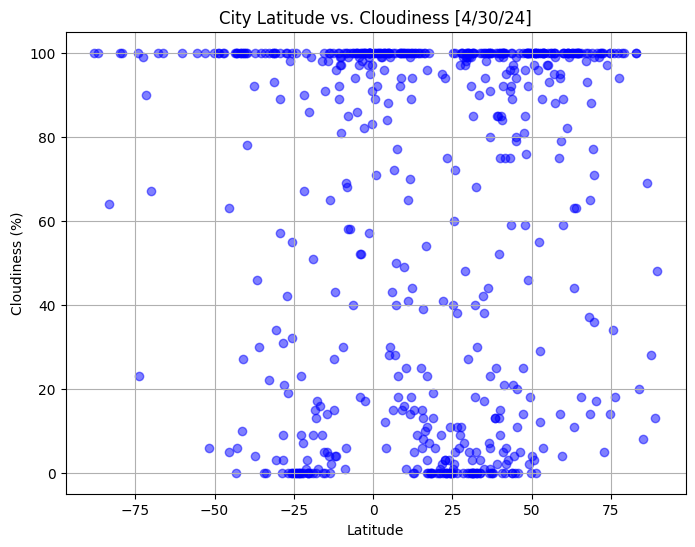

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'], color='blue', alpha=0.5)
plt.title('City Latitude vs. Cloudiness [4/30/24]')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

4/30/24 seems to be a cloudy day in the world overall. Not clear from this one point in time if that is always true.  Interestingly, the data is pretty bimodal, with most points aggregating at near 100% or near 0% cloudiness. Note that none of the cities on or very near the equator have very low cloudiness.

## Latitude vs. Wind Speed Plot

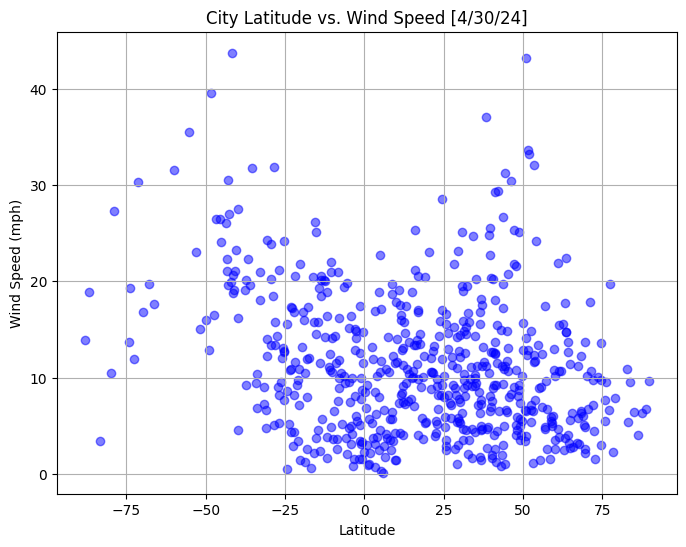

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed'], color='blue', alpha=0.5)
plt.title('City Latitude vs. Wind Speed [4/30/24]')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

Plot shows wind speeds vs latitude.  There are higher winds around the +/-50 degrees latitudes,which are the polar jet streams.

## Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

# Split Latitude into hemispheres N/S
north_df = cities_df[cities_df['Latitude'] >= 0].copy()
south_df = cities_df[cities_df['Latitude'] < 0].copy()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y = -1.0x + 96.35


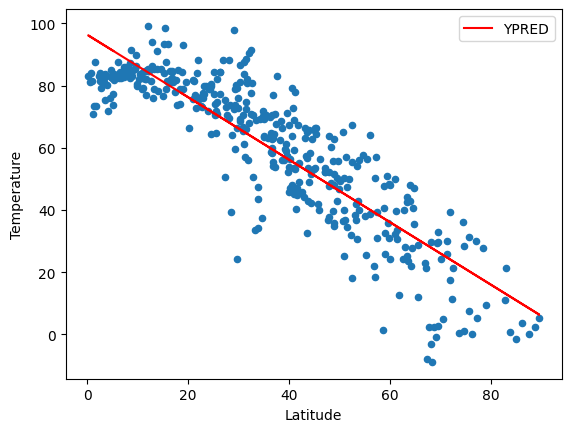

In [67]:
#Set x and y and reshape to np array
x = north_df['Latitude'].values.reshape(-1, 1) 
y = north_df['Temperature'].values.reshape(-1, 1)

# Fit Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
north_df['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = north_df.plot.scatter(x='Latitude', y='Temperature')
north_df.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

Straightforward: The temperature decreases on average 1 degree F per degree of latitude to the north.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear equation is: y = 1.21x + 95.04


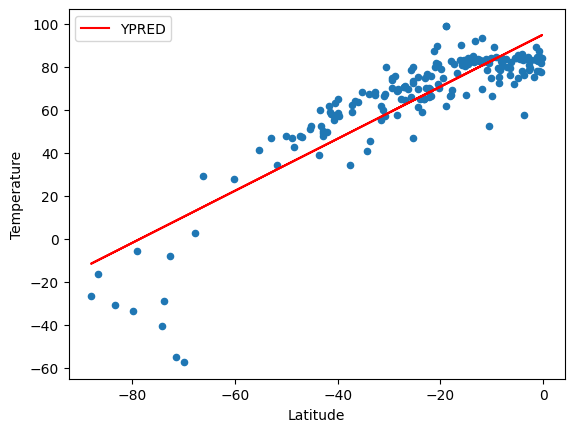

In [68]:
#Set x and y and reshape to np array
x = south_df['Latitude'].values.reshape(-1, 1) 
y = south_df['Temperature'].values.reshape(-1, 1)

# Fit Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
south_df['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = south_df.plot.scatter(x='Latitude', y='Temperature')
south_df.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

Temperature dropoff a little more quickly in the southern hemisphere ~1.21 degrees lower per degree latitude. Makes sense as the southern hemisphere is in mid-late autumn and that the land mass percentage of the two hemispheres is not the same.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y = 0.33x + 56.55


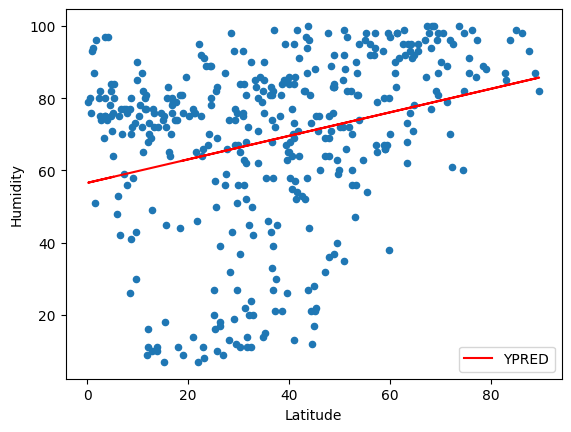

In [69]:
#Set x and y and reshape to np array
x = north_df['Latitude'].values.reshape(-1, 1) 
y = north_df['Humidity'].values.reshape(-1, 1)

# Fit Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
north_df['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = north_df.plot.scatter(x='Latitude', y='Humidity')
north_df.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

In general the humidity rises about 0.33% per degree lat in the north, but the variance is very very wide, especially in the lower latitudes. Parts of jungly SE Asia are at the same latitude as the Sahara. It's more humid (no low humidity) and with much lower variance in the extreme north.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear equation is: y = -0.17x + 67.91


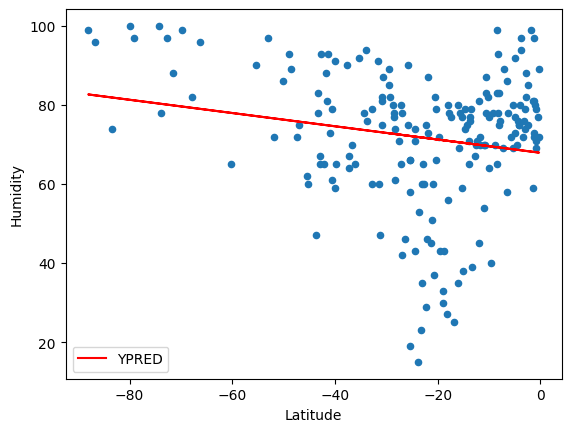

In [70]:
#Set x and y and reshape to np array
x = south_df['Latitude'].values.reshape(-1, 1) 
y = south_df['Humidity'].values.reshape(-1, 1)

# Fit Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
south_df['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = south_df.plot.scatter(x='Latitude', y='Humidity')
south_df.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

The humidity in the southern hemisphere also varies a lot from the trend, especially where there is a local minimum around -15 to -20 degrees S.  There are also much lower low humidity values in the -15 to -30 S range: both the Outback desert and the Kalahari are in approximately these southern latitudes.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y = 0.31x + 48.79


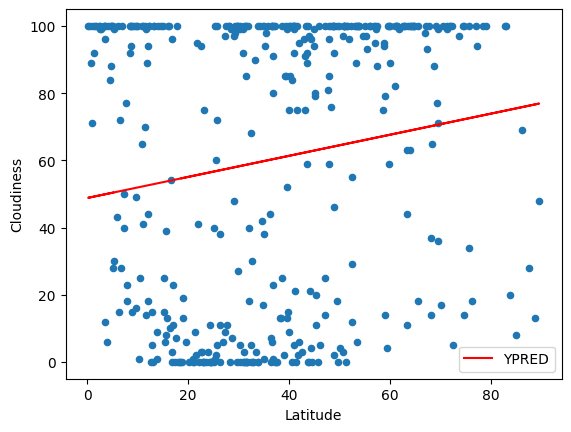

In [71]:
#Set x and y and reshape to np array
x = north_df['Latitude'].values.reshape(-1, 1) 
y = north_df['Cloudiness'].values.reshape(-1, 1)

# Fit Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
north_df['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = north_df.plot.scatter(x='Latitude', y='Cloudiness')
north_df.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

There doesn't appera to be much to say about cloudiness besides that north of the Jetstream ~50 degrees, there are no completely clear skies. And in a general, broad sense, it gets cloudier as you go north.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear equation is: y = -0.09x + 59.52


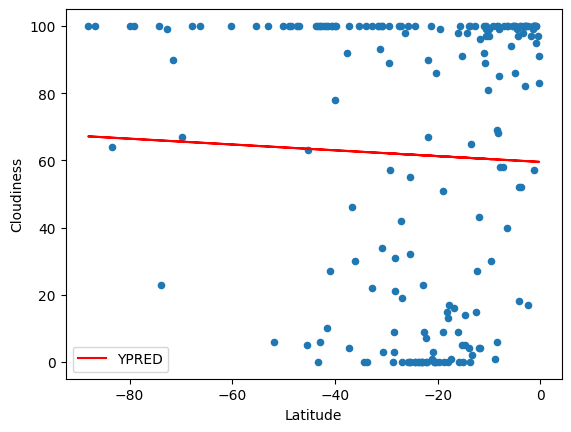

In [72]:
#Set x and y and reshape to np array
x = south_df['Latitude'].values.reshape(-1, 1) 
y = south_df['Cloudiness'].values.reshape(-1, 1)

# Fit Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
south_df['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = south_df.plot.scatter(x='Latitude', y='Cloudiness')
south_df.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

No completely clear skies to the south of about 45 degrees, approximately the jet stream. Lots of very cloudy skies at all latitudes. Very little useful trend.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y = -0.01x + 10.52


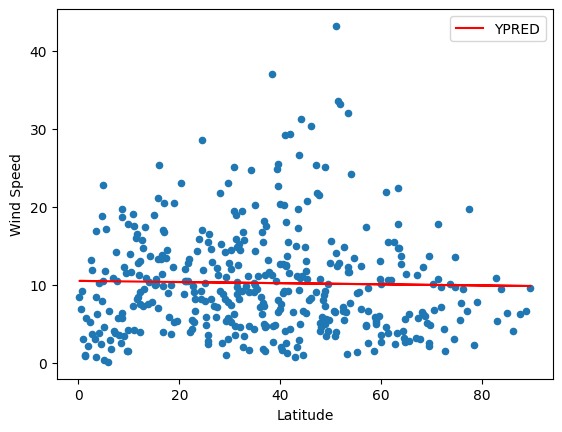

In [73]:
#Set x and y and reshape to np array
x = north_df['Latitude'].values.reshape(-1, 1) 
y = north_df['Wind Speed'].values.reshape(-1, 1)

# Fit Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
north_df['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = north_df.plot.scatter(x='Latitude', y='Wind Speed')
north_df.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

Almost completely flat linear trend in wind speed, almost no zero values, maybe one near the equator.  Highest wind speeds around 50 degrees north, at the jet stream.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear equation is: y = -0.19x + 9.03


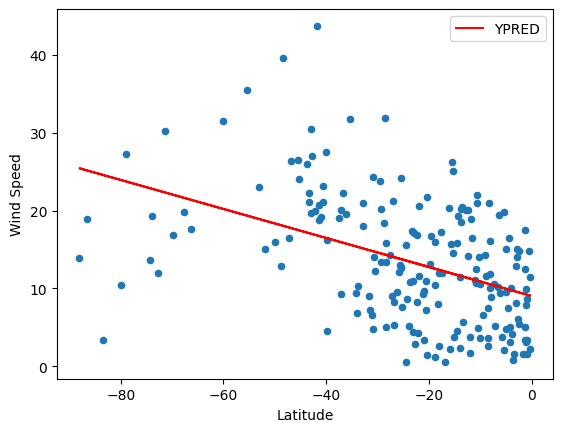

In [74]:
#Set x and y and reshape to np array
x = south_df['Latitude'].values.reshape(-1, 1) 
y = south_df['Wind Speed'].values.reshape(-1, 1)

# Fit Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
south_df['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = south_df.plot.scatter(x='Latitude', y='Wind Speed')
south_df.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

Winds DO increase as one moves from the equator toward the South Pole. Again, highest wind speeds around the 40-50 degree mark, or the polar jet stream. Sailing south of Cape Horn and the Cape of Good Hope, beneath South America and Africa, are known for storms and high winds.